In [13]:
import numpy as np
import scipy.optimize as scipy
import matplotlib.pyplot as plt

In [14]:
def f(x):
  return x**3 - 2*x + 2

def df(x):
  return 3*x**2 - 2

def ddf(x):
  return 6*x

In [15]:
# Wilkinson's Polynomial

def f(x):
    prod = 1.0
    for k in range(1, 21):
        prod *= (x - k)
    return prod

def df(x):
    s = 0.0
    for k in range(1, 21):
        s += 1.0 / (x - k)
    return f(x) * s

def ddf(x):
    s1 = 0.0
    s2 = 0.0
    for k in range(1, 21):
        diff = x - k
        s1 += 1.0 / diff
        s2 += 1.0 / (diff**2)
    return f(x) * (s1**2 - s2)

In [16]:
a = -60
b = 1.125
x0 = -10

### Root-Finding Algorithms

In [17]:
root, bisectinfo = scipy.bisect(f, a, b, full_output=True)
# print(root)
# print(bisectinfo)

In [18]:
root, brentqinfo = scipy.brentq(f, a, b, maxiter=500, full_output=True)
# print(root)
# print(brentqinfo)

In [19]:
root, toms748info = scipy.toms748(f, a, b, full_output=True)
# print(root)
# print(toms748info)

In [20]:
root, newtoninfo = scipy.newton(f, x0, fprime=df, maxiter=500, full_output=True)
# print(root)
# print(newtoninfo)

In [21]:
root, secantinfo = scipy.newton(f, x0, maxiter=500, full_output=True)
# print(root)
# print(secantinfo)

In [22]:
root, halleyinfo = scipy.newton(f, x0, fprime=df, fprime2=ddf,
                                maxiter=500, full_output=True)
# print(root)
# print(halleyinfo)

### Plots

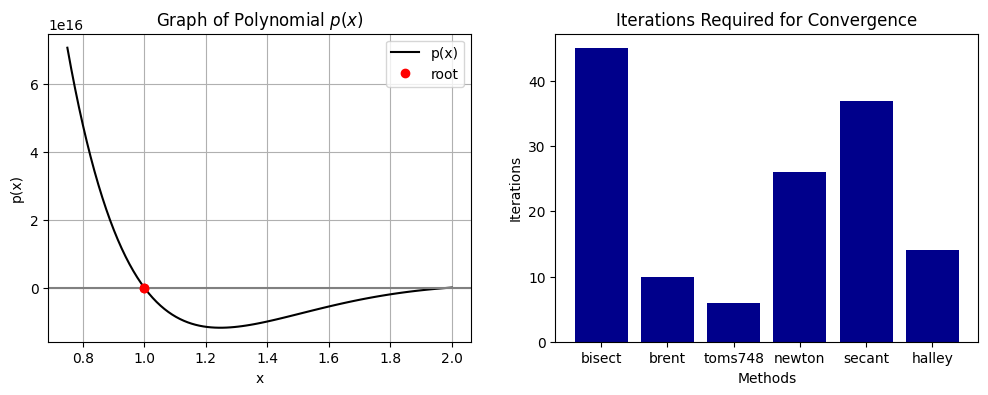

In [23]:
plt.figure(figsize=(12, 4))

# First plot: the function itself
x = np.linspace(0.75, 2, 100)

plt.subplot(1, 2, 1)
plt.plot(x, f(x), color='k')
plt.title('Graph of Polynomial $p(x)$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)

plt.plot(root, f(root), 'ro', label='root')
plt.axhline(y=0, color='gray', label='x-axis')
plt.plot(root, f(root), 'ro')
# plt.plot(root+1, f(root), 'ro')
plt.legend(['p(x)', 'root'])

# Second plot: the number of iterations
methods = ['bisect', 'brent', 'toms748', 'newton', 'secant', 'halley']
results = [bisectinfo.iterations, brentqinfo.iterations,
           toms748info.iterations, newtoninfo.iterations,
           secantinfo.iterations, halleyinfo.iterations]
plt.subplot(1, 2, 2)
plt.bar(methods, results, color='darkblue')
plt.title('Iterations Required for Convergence')
plt.xlabel('Methods')
plt.ylabel('Iterations')

plt.show()

### Limited Iterations Chart

In [24]:
maximum = 15
known = 1

bisectroot, bisectinfo = scipy.bisect(f, a, b, full_output=True, maxiter=maximum, disp=False)
brentqroot, brentqinfo = scipy.brentq(f, a, b, full_output=True, maxiter=maximum, disp=False)
toms748root, toms748info = scipy.toms748(f, a, b, full_output=True, maxiter=maximum, disp=False)
newtonroot, newtoninfo = scipy.newton(f, x0, fprime=df, full_output=True, maxiter=maximum, disp=False)
secantroot, secantinfo = scipy.newton(f, x0, full_output=True, maxiter=maximum, disp=False)
halleyroot, halleyinfo = scipy.newton(f, x0, fprime=df, fprime2=ddf, full_output=True, maxiter=maximum, disp=False)

print(bisectroot, abs(bisectroot - known), bisectinfo.converged)
print(brentqroot, abs(brentqroot - known), brentqinfo.converged)
print(toms748root, abs(toms748root - known), toms748info.converged)
print(newtonroot, abs(newtonroot - known), newtoninfo.converged)
print(secantroot, abs(secantroot - known), secantinfo.converged)
print(halleyroot, abs(halleyroot - known), halleyinfo.converged)

0.9981536865234375 0.0018463134765625 False
1.0 0.0 True
1.0 0.0 True
-0.5210928410084515 1.5210928410084517 False
-2.384885472924518 3.384885472924518 False
1.0 0.0 True
